<a href="https://colab.research.google.com/github/sonmh79/simple_VRP_GA/blob/main/VRP_kmeans_with_capacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Index

##0. Information
##1. Proprecessing data (distance, capacity)
##2. Make distance dataframe
##3. VRP

##0.Information

NAME : A-n32-k5

COMMENT : (Augerat et al, No of trucks: 5, Optimal value: 784)

TYPE : CVRP

DIMENSION : 32

EDGE_WEIGHT_TYPE : EUC_2D 

CAPACITY : 100

##1. Proprecessing distance data - distance

In [9]:
d = """1 82 76
2 96 44
3 50 5
4 49 8
5 13 7
6 29 89
7 58 30
8 84 39
9 14 24
10 2 39
11 3 82
12 5 10
13 98 52
14 84 25
15 61 59
16 1 65
17 88 51
18 91 2
19 19 32
20 93 3
21 50 93
22 98 14
23 5 42
24 42 9
25 61 62
26 9 97
27 80 55
28 57 69
29 23 15
30 20 70
31 85 60
32 98 5"""
d

'1 82 76\n2 96 44\n3 50 5\n4 49 8\n5 13 7\n6 29 89\n7 58 30\n8 84 39\n9 14 24\n10 2 39\n11 3 82\n12 5 10\n13 98 52\n14 84 25\n15 61 59\n16 1 65\n17 88 51\n18 91 2\n19 19 32\n20 93 3\n21 50 93\n22 98 14\n23 5 42\n24 42 9\n25 61 62\n26 9 97\n27 80 55\n28 57 69\n29 23 15\n30 20 70\n31 85 60\n32 98 5'

In [10]:
data = d.split("\n")
for i in range(len(data)):
  data[i] = [] + data[i].split(" ")
data

[['1', '82', '76'],
 ['2', '96', '44'],
 ['3', '50', '5'],
 ['4', '49', '8'],
 ['5', '13', '7'],
 ['6', '29', '89'],
 ['7', '58', '30'],
 ['8', '84', '39'],
 ['9', '14', '24'],
 ['10', '2', '39'],
 ['11', '3', '82'],
 ['12', '5', '10'],
 ['13', '98', '52'],
 ['14', '84', '25'],
 ['15', '61', '59'],
 ['16', '1', '65'],
 ['17', '88', '51'],
 ['18', '91', '2'],
 ['19', '19', '32'],
 ['20', '93', '3'],
 ['21', '50', '93'],
 ['22', '98', '14'],
 ['23', '5', '42'],
 ['24', '42', '9'],
 ['25', '61', '62'],
 ['26', '9', '97'],
 ['27', '80', '55'],
 ['28', '57', '69'],
 ['29', '23', '15'],
 ['30', '20', '70'],
 ['31', '85', '60'],
 ['32', '98', '5']]

In [11]:
#make dataframe of distance
import pandas as pd
import math

df = pd.DataFrame(data)
df.drop(0,inplace=True,axis=1)
df.head(10) 
df.columns = ["x","y"]
ud = []
'''
for i in range(len(df)):
  d=math.sqrt((int(df["x"][i])-int(df["x"][0]))**2 + (int(df["y"][i])-int(df["y"][0]))**2)
  ud.append(d)
'''
df["x"] = df["x"].astype("int")
df["y"] = df["y"].astype("int")
df.head(10)

,x,y
0,82,76
1,96,44
2,50,5
3,49,8
4,13,7
5,29,89
6,58,30
7,84,39
8,14,24
9,2,39


##1. Proprecessing distance data - capacity

In [12]:
c = """1 0 
2 19 
3 21 
4 6 
5 19 
6 7 
7 12 
8 16 
9 6 
10 16 
11 8 
12 14 
13 21 
14 16 
15 3 
16 22 
17 18 
18 19 
19 1 
20 24 
21 8 
22 12 
23 4 
24 8 
25 24 
26 24 
27 2 
28 20 
29 15 
30 2 
31 14 
32 9"""
c

'1 0 \n2 19 \n3 21 \n4 6 \n5 19 \n6 7 \n7 12 \n8 16 \n9 6 \n10 16 \n11 8 \n12 14 \n13 21 \n14 16 \n15 3 \n16 22 \n17 18 \n18 19 \n19 1 \n20 24 \n21 8 \n22 12 \n23 4 \n24 8 \n25 24 \n26 24 \n27 2 \n28 20 \n29 15 \n30 2 \n31 14 \n32 9'

In [13]:
capa = c.split("\n")
for i in range(len(capa)):
  capa[i] = [] + capa[i].split(" ")
df["c"] = [c[1] for c in capa]
df["c"] = df["c"].astype("int")
df

,x,y,c
0,82,76,0
1,96,44,19
2,50,5,21
3,49,8,6
4,13,7,19
5,29,89,7
6,58,30,12
7,84,39,16
8,14,24,6
9,2,39,16


#2. Make distance dataframe

In [14]:
import numpy as np

def _make_calc_data():
    print("Making distance data....")
    n = len(df)
    d = np.zeros((n,n))
    for i in range(n):
      for j in range(i+1,n):
        distance = round(_caldist(i,j))
        d[i][j] = distance
        d[j][i] = distance
    d_data = pd.DataFrame(d)
    d_data.columns = d_data.index
    d_data = d_data.astype("int")
    print("Complete making data!!")
    print(d_data.info())
    return d_data


def _caldist(a,b):
    return math.sqrt((df.loc[a]["x"]-df.loc[b]["x"])**2 + (df.loc[a]["y"]-df.loc[b]["y"])**2)

d_data = _make_calc_data()
d_data

Making distance data....
Complete making data!!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       32 non-null     int64
 1   1       32 non-null     int64
 2   2       32 non-null     int64
 3   3       32 non-null     int64
 4   4       32 non-null     int64
 5   5       32 non-null     int64
 6   6       32 non-null     int64
 7   7       32 non-null     int64
 8   8       32 non-null     int64
 9   9       32 non-null     int64
 10  10      32 non-null     int64
 11  11      32 non-null     int64
 12  12      32 non-null     int64
 13  13      32 non-null     int64
 14  14      32 non-null     int64
 15  15      32 non-null     int64
 16  16      32 non-null     int64
 17  17      32 non-null     int64
 18  18      32 non-null     int64
 19  19      32 non-null     int64
 20  20      32 non-null     int64
 21  21      32 non-null     int64
 22  22  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0,35,78,76,98,55,52,37,86,88,79,101,29,51,27,82,26,75,77,74,36,64,84,78,25,76,21,26,85,62,16,73
1,35,0,60,59,91,81,40,13,84,94,100,97,8,22,38,97,11,42,78,41,67,30,91,64,39,102,19,46,79,80,19,39
2,78,60,0,3,37,87,26,48,41,59,90,45,67,39,55,77,60,41,41,43,88,49,58,9,58,101,58,64,29,72,65,48
3,76,59,3,0,36,83,24,47,38,56,87,44,66,39,52,75,58,42,38,44,85,49,56,7,55,98,56,62,27,68,63,49
4,98,91,37,36,0,84,51,78,17,34,76,9,96,73,71,59,87,78,26,80,94,85,36,29,73,90,82,76,13,63,89,85
5,55,81,87,83,84,0,66,74,67,57,27,83,78,84,44,37,70,107,58,107,21,102,53,81,42,22,61,34,74,21,63,109
6,52,40,26,24,51,66,0,28,44,57,76,57,46,26,29,67,37,43,39,44,64,43,54,26,32,83,33,39,38,55,40,47
7,37,13,48,47,78,74,28,0,72,82,92,84,19,14,30,87,13,38,65,37,64,29,79,52,33,95,16,40,66,71,21,37
8,86,84,41,38,17,67,44,72,0,19,59,17,89,70,59,43,79,80,9,82,78,85,20,32,60,73,73,62,13,46,80,86
9,88,94,59,56,34,57,57,82,19,0,43,29,97,83,62,26,87,96,18,98,72,99,4,50,63,58,80,63,32,36,86,102


#3. VRP

In [15]:
# 1. clustering
# 2. routing >> chromo > ga 
# 3. graphic
import random
import sys
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

class VRP:
  def __init__(self,dataset,d_data = d_data,capacity=100,cnum=100,mutation_prob=0.2,ev_times=100):
    self.n = None
    self.c = capacity
    self.root = [dataset.loc[0]["x"],dataset.loc[0]["y"]]
    self.data = dataset
    self.d_data = d_data
    self.cnum = cnum
    self.centers = []
    self.nth_cluster, self.nth_needs = self._clustering() # 1. clustering
    self.c_nodes = None
    self.cnt = 0
    self.mutation_prob = mutation_prob
    self.ev_times = ev_times
    self.dist = 0
  
  def _make_calc_data(self):
    print("Making distance data....")
    n = len(self.data)
    d = np.zeros((n,n))
    for i in range(n):
      for j in range(i+1,n):
        distance = round(self._caldist(i,j))
        d[i][j] = d[j][i] = distance
    d_data = pd.DataFrame(d)
    d_data.columns = d_data.index
    print("Complete making data!!")
    print(d_data.info())
    return d_data

  
  def _clustering(self):
    data = self.data.drop(0,axis=0)
    n = 1
    flag = True
    while flag: #stop KMEANS if all cluster meet capacity
      kmeans = KMeans(n_clusters=n)
      kmeans.fit(data)
      p=kmeans.predict(data)
      data["p"] = p
      nth_cluster = []
      nth_needs = []
      for i in range(n):
        cluster = data[data["p"]==i]
        cluster_needs = cluster.sum(axis=0).c
        if cluster_needs <= self.c:
          flag = False
          nth_needs.append(cluster.sum(axis=0).c)
          nth_cluster.append(cluster)
        else:
          flag = True
          n += 1
          break
    self.centers = kmeans.cluster_centers_
    self.n = n
    return nth_cluster,nth_needs

  #make many chromos...
  def _chromo(self,nodes):
    res = []
    for _ in range(200):
     res.append(random.sample(nodes,len(nodes))) 
    return res

  #get start node
  def _getstart(self,route):
    mindist = sys.maxsize
    minnode = None
    for n in route:
      dist,node = (self.data.loc[n]["x"]-self.root[0])**2 + (self.data.loc[n]["y"]-self.root[1])**2, n
      if dist < mindist:
        mindist = dist
        minnode = node
    print("{}th cluster's start node: ".format(self.cnt),minnode)
    return minnode

  #calculate distance with a and b 
  def _caldist(self,a,b):
    return math.sqrt((self.data.loc[a]["x"]-self.data.loc[b]["x"])**2 + (self.data.loc[a]["y"]-self.data.loc[b]["y"])**2)

  #get distance of each route
  def _getdist(self, chromo):
    dist = 0
    dist_list = []

    for route in chromo:
      r = route.copy()
      dist = 0
      
      s = r[0]
      while len(r)>1:
        dist += self.d_data.loc[r[1]][r[0]]
        r.pop(0)
      dist_list.append(dist)
    fit = list(zip(dist_list,chromo))
    fit.sort(key = lambda x:x[0])

    return fit

  def _rand(self,x,y):
    return int(random.uniform(x,y))

  def _crossover(self,p1,p2):
    swap_point = self._rand(1,len(self.c_nodes)-1)
    c1,c2 = [],[]

    i = 0
    while i < swap_point:
      c1.append(p1[i])
      c2.append(p2[i])
      i+=1

    for e in p2:
      if e not in c1:
        c1.append(e)

    for e in p1:
      if e not in c2:
        c2.append(e)
    
    #mutation
    if random.uniform(0,1) <= self.mutation_prob and len(self.c_nodes)>2:
      e1,e2 = random.sample(range(1,len(self.c_nodes)),2)
      #target will select mutation child
      if e1 > e2:
        target = e1
      else:
        target = e2
      
      if target%2 == 0:
        c1[e1],c1[e2] = c1[e2],c1[e1]
      else:  
        c2[e1],c2[e2] = c2[e2],c2[e1]
    next_gen = self._getdist([c1,c2,p1,p2])
    #print("next_gen: ",next_gen)
    c1,c2 = next_gen[0][1],next_gen[1][1]
    #print("c1,c2: ",c1,c2)
    return [c1,c2]

  
  def _select_parent(self,parents):
    fitness = [1/route[0] for route in parents] 
    sum = 0

    for f in fitness:
      sum += f
    p_index = set()

    while len(p_index)<2:
      fit = 0
      target = random.uniform(0,sum)
      for i in range(len(fitness)):
        fit += fitness[i]
        if fit > target:
          p_index.add(i)
          break  
    return list(p_index)

  
  def _make_child(self,dist_routes):
    parents = dist_routes.copy()
    routes = [route[1] for route in parents]
    child = []

    # select top 100 chromos
    while parents and len(child)<self.cnum:
      selected_parents = self._select_parent(parents)
      p1,p2 = routes.pop(selected_parents[0]),routes.pop(selected_parents[1]-1)
      parents.pop(selected_parents[0]),parents.pop(selected_parents[1]-1)
      c1,c2 = self._crossover(p1,p2)
      child += c1,c2

    return child

  def evolution(self,chromo):
    
    dist_routes = self._getdist(chromo) #(dist,routes)
    child = self._make_child(dist_routes)

    return child

  def _ga(self,cluster): #input: Series
    self.cnt += 1
    print("{}/{}th-cluster ".format(self.cnt,self.n))
    nodes = list(cluster.index)
    print("Nodes: {}/{}".format(len(nodes),len(self.data)))
    self.c_nodes = nodes  #cluster nodes
    chromo = self._chromo(nodes)
    gen = self.evolution(chromo)
    info = self._getdist(gen)[0]
    min_dist,min_route = info[0],info[1]
    print("first genenration minimun distance: ",(min_dist,min_route))
    stack = 0
    for i in range(self.ev_times):
      gen = self.evolution(gen)
      # Evolution break - break if same min distance repeat 20times
      cur = self._getdist(gen)[0]
      cur_min_dist,cur_min_route = cur[0],cur[1]
      if min_dist == cur_min_dist:
        stack += 1
      else:
        stack = 0
      min_dist = cur_min_dist
      if stack >= 20:
        # Determine start node to minimum distance
        start_to_depot,end_to_depot = v._caldist(cur_min_route[0],0),v._caldist(cur_min_route[-1],0)
        self.dist += start_to_depot + end_to_depot + min_dist
        print("---------- Evolution early break ----------")
        break

      if (i+1) % 10 == 0:
        print("{}/{}th evolution min distance: ".format(i+1,self.ev_times),(min_dist,min_route))
      
      # to avoid local minimum
      if i == 30:
        self.mutation_prob = i/100
        print("Mutation prob upgrade! mutation_prob: ",self.mutation_prob)
      elif i == 50:
        self.mutation_prob = i/100
        print("Mutation prob upgrade! mutation_prob: ",self.mutation_prob)
      elif i == 70:
        self.mutation_prob = i/100
        print("Mutation prob upgrade! mutation_prob: ",self.mutation_prob)
      
    print("-------------------------------------------------------")
    print("Total distance: ",self.dist)
    print("Cluster needs: {}/{}".format(self.nth_needs[self.cnt-1],self.c))
    res = self._getdist(gen)
    return res
    
#if __name__ == "__main__":
  


1/6th-cluster 
Nodes: 5/32
first genenration minimun distance:  (34, [17, 19, 31, 21, 13])
10/200th evolution min distance:  (34, [17, 19, 31, 21, 13])
---------- Evolution early break ----------
-------------------------------------------------------
Total distance:  159.5844888688509
Cluster needs: 80/100
[13, 21, 31, 19, 17]
2/6th-cluster 
Nodes: 7/32
first genenration minimun distance:  (84, [9, 22, 11, 4, 28, 18, 8])
10/200th evolution min distance:  (65, [9, 22, 11, 4, 28, 18, 8])
20/200th evolution min distance:  (65, [9, 22, 11, 4, 28, 18, 8])
---------- Evolution early break ----------
-------------------------------------------------------
Total distance:  414.1414088967539
Cluster needs: 75/100
[9, 22, 18, 8, 28, 4, 11]
3/6th-cluster 
Nodes: 4/32
first genenration minimun distance:  (36, [20, 27, 24, 14])
10/200th evolution min distance:  (36, [20, 27, 24, 14])
---------- Evolution early break ----------
-------------------------------------------------------
Total distance:

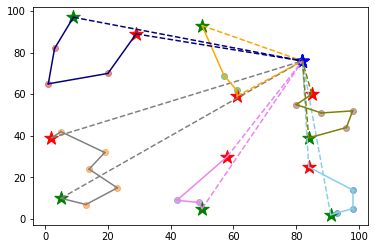

In [16]:
v = VRP(df,ev_times=200)   
v.centers
root = v.root
colors = ["skyblue","gray","orange","navy","violet","olive","acua","teal","gold","tan"]
for i in range(len(v.nth_cluster)):
  a = v.nth_cluster[i]
  b = v._ga(a)
  route = b[0][1]
  print(route)
  x = [df.loc[r]["x"] for r in route]
  y = [df.loc[r]["y"] for r in route]
  start_to_depot,end_to_depot = v._caldist(route[0],0),v._caldist(route[-1],0)
  # Determine start node to minimum distance
  if start_to_depot > end_to_depot:
    start_x,start_y = x[-1],y[-1]
    end_x,end_y = x[0],y[0]
  else:
    start_x,start_y = x[0],y[0]
    end_x,end_y = x[-1],y[-1]
  
  if i <= len(colors)-1:
    color = colors[i]
  else:
    color = colors[i%(len(colors))]
  #Graphic
  plt.scatter(x,y,alpha=0.5,cmap="gist_rainbow")
  plt.scatter(start_x,start_y,s=200,marker="*",c="red",edgecolors="red") #start node
  plt.scatter(end_x,end_y,s=200,marker="*",c="green",edgecolors="green") #last node
  plt.scatter(root[0],root[1],s=200,marker="*",c="b",edgecolors="b") #depot node
  plt.plot([start_x,root[0]],[start_y,root[1]],c=color,linestyle="--")
  plt.plot([end_x,root[0]],[end_y,root[1]],c=color,linestyle="--")
  for j in range(len(route)-1):
    plt.plot(x[j:j+2],y[j:j+2],c=color)
plt.show()